## Choosing between Two Machine Learning Models

### 01 About

**Purpose:**<br>
The purpose of this project is to look at two machine learning models and find out the following:

1. Which ML model has better accuracy score to predict churn.
2. Are there similarities and differences between them?

**Dataset:**<br>
The dataset used in this project is a set of data from a bank in the US, and they are experiencing customer churn - Kaggle. 

**Enquirer:**<br>
The boss of ACDC Pte Ltd wants to know which machine learning model  - **Decision Tree** OR **Random Forest Classifier** - will be the better model to predict customer churn.

**Data source:**<br>
https://www.kaggle.com/datasets/shantanudhakadd/bank-customer-churn-prediction

### 02 EDA & DATA PRE-PROCESSING

#### Import Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#### Import Data

In [2]:
df = pd.read_csv('Churn_Modelling.csv')

#### Data overview

In [3]:
# No. of (Row, Column)
print("Number of Rows & Columns:", df.shape)

Number of Rows & Columns: (10000, 14)


In [4]:
# Top 10 Row
df.head(10)

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   
5          6    15574012       Chu          645     Spain    Male   44   
6          7    15592531  Bartlett          822    France    Male   50   
7          8    15656148    Obinna          376   Germany  Female   29   
8          9    15792365        He          501    France    Male   44   
9         10    15592389        H?          684    France    Male   27   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   
5       8  113755.78              2          1               0   
6       7       0.00              2          1               1   
7       4  115046.74              4          1               0   
8       4  142051.07              2          0               1   
9       2  134603.88              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0  
5        149756.71       1  
6         10062.80       0  
7        119346.88       1  
8         74940.50       0  
9         71725.73       0

Columns to consider:<br>
**Gender** - Male & Female <br>
**Geography** - France, Spain & Germany

Columns to drop:<br>
**RowNumber**<br>
**CustomerId**<br>
**Surname**<br>

In [5]:
# Checking for Missing Values - non-null
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
# Check for duplicates
df.dropna(inplace=True)
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

**Drop:** <br>
Columns **'Surname'**, '**RowNumber'** & **'CustomerId'** are dropped because they have little use for ML.

In [7]:
# Remove 3 columns that are NOT Necessary
df=df.drop(['Surname', 'RowNumber', 'CustomerId'],axis=1)

In [8]:
# Check
df.head(10)

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0          619    France  Female   42       2       0.00              1   
1          608     Spain  Female   41       1   83807.86              1   
2          502    France  Female   42       8  159660.80              3   
3          699    France  Female   39       1       0.00              2   
4          850     Spain  Female   43       2  125510.82              1   
5          645     Spain    Male   44       8  113755.78              2   
6          822    France    Male   50       7       0.00              2   
7          376   Germany  Female   29       4  115046.74              4   
8          501    France    Male   44       4  142051.07              2   
9          684    France    Male   27       2  134603.88              1   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0          1               1        101348.88       1  
1          0               1        112542.58       0  
2          1               0        113931.57       1  
3          0               0         93826.63       0  
4          1               1         79084.10       0  
5          1               0        149756.71       1  
6          1               1         10062.80       0  
7          1               0        119346.88       1  
8          0               1         74940.50       0  
9          1               1         71725.73       0

/var/folders/0d/4hq1mbtj1jjgbt5t0jlvjg1w0000gn/T/ipykernel_36541/1404235099.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, annot_kws={"size": 7}, square=True, fmt='.2g')


<Axes: >

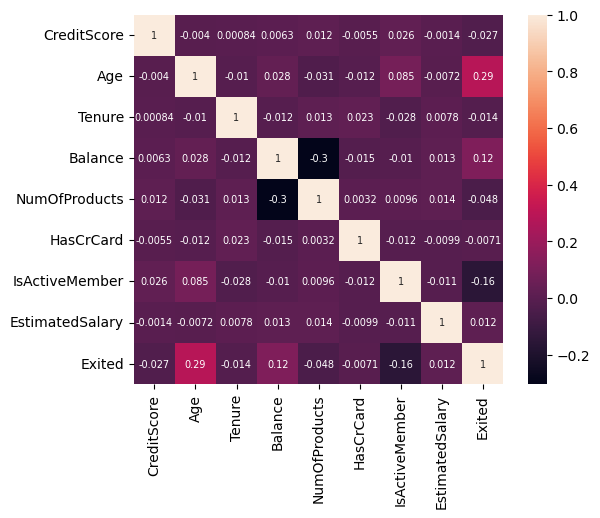

In [9]:
sns.heatmap(df.corr(), annot=True, annot_kws={"size": 7}, square=True, fmt='.2g')

plt.savefig('01 Heatmap.jpg', dpi=300)
plt.show()

### 03 Visualization of dataset

[Text(0, 0, '4543'), Text(0, 0, '5457')]

(0.0, 6000.0)

Text(0.5, 1.0, 'No. of Females and Males')

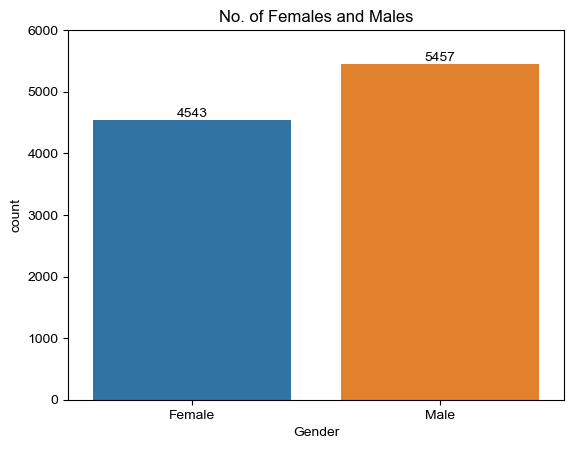

In [10]:
# Gender
sns.set_style()
p = sns.countplot(x='Gender', data=df)
p.bar_label(p.containers[0])
sns.set(rc={'figure.figsize': (7,5)})
plt.ylim(0,6000)
plt.title('No. of Females and Males')

plt.savefig ('02 No. of Females and Males.jpg', dpi=300)
plt.show()

<Axes: xlabel='Gender'>

Exited     0     1
Gender            
Female  3404  1139
Male    4559   898


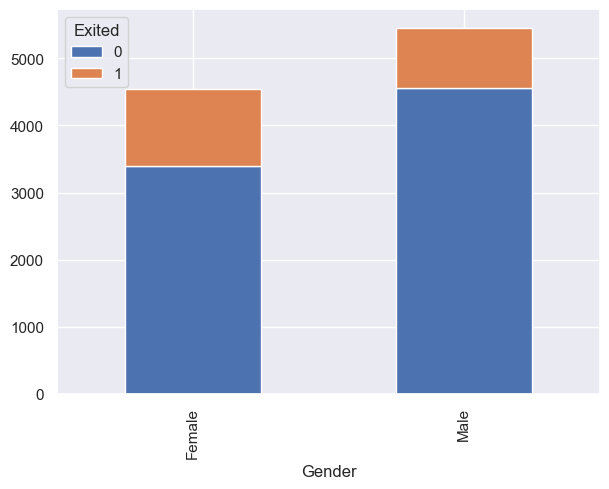

In [11]:
counts = df.groupby(['Gender', 'Exited']).Exited.count().unstack()
counts.plot(kind='bar', stacked=True)
print(counts)
plt.savefig('03 Gender Exited.jpg', dpi=300)
plt.show()

<Axes: xlabel='Geography'>

Exited        0    1
Geography           
France     4204  810
Germany    1695  814
Spain      2064  413


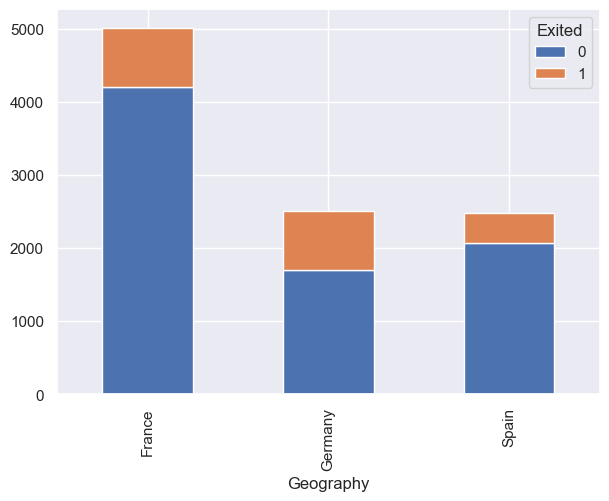

In [12]:
counts = df.groupby(['Geography', 'Exited']).Exited.count().unstack()
counts.plot(kind='bar', stacked=True)
print(counts)
plt.savefig('04 Geography Exited.jpg', dpi=300)
plt.show()


(array([ 26.,  44.,  54.,  72., 100., 122., 181., 204., 231., 266., 301.,
        313., 414., 407., 422., 480., 476., 447., 512., 433., 431., 366.,
        300., 282., 243., 201., 162., 128.,  88., 257.]),
 array([405.        , 419.83333333, 434.66666667, 449.5       ,
        464.33333333, 479.16666667, 494.        , 508.83333333,
        523.66666667, 538.5       , 553.33333333, 568.16666667,
        583.        , 597.83333333, 612.66666667, 627.5       ,
        642.33333333, 657.16666667, 672.        , 686.83333333,
        701.66666667, 716.5       , 731.33333333, 746.16666667,
        761.        , 775.83333333, 790.66666667, 805.5       ,
        820.33333333, 835.16666667, 850.        ]),
 <BarContainer object of 30 artists>)

(array([ 10.,   6.,   3.,   8.,  13.,  21.,  18.,  36.,  35.,  52.,  73.,
         86.,  91.,  96., 112., 126., 132., 131., 130., 119., 115., 116.,
         93.,  94.,  78.,  67.,  48.,  33.,  26.,  69.]),
 array([350.        , 366.66666667, 383.33333333, 400.        ,
        416.66666667, 433.33333333, 450.        , 466.66666667,
        483.33333333, 500.        , 516.66666667, 533.33333333,
        550.        , 566.66666667, 583.33333333, 600.        ,
        616.66666667, 633.33333333, 650.        , 666.66666667,
        683.33333333, 700.        , 716.66666667, 733.33333333,
        750.        , 766.66666667, 783.33333333, 800.        ,
        816.66666667, 833.33333333, 850.        ]),
 <BarContainer object of 30 artists>)

[Text(0.5, 0, 'CreditScore'), Text(0, 0.5, 'count')]

(array([8.400e+01, 1.220e+02, 3.590e+02, 3.820e+02, 8.730e+02, 7.570e+02,
        1.229e+03, 8.190e+02, 1.108e+03, 5.410e+02, 5.350e+02, 2.330e+02,
        2.230e+02, 9.100e+01, 6.700e+01, 9.100e+01, 7.000e+01, 9.300e+01,
        4.700e+01, 7.000e+01, 3.300e+01, 5.400e+01, 2.900e+01, 3.000e+01,
        9.000e+00, 8.000e+00, 2.000e+00, 1.000e+00, 1.000e+00, 2.000e+00]),
 array([18.        , 20.46666667, 22.93333333, 25.4       , 27.86666667,
        30.33333333, 32.8       , 35.26666667, 37.73333333, 40.2       ,
        42.66666667, 45.13333333, 47.6       , 50.06666667, 52.53333333,
        55.        , 57.46666667, 59.93333333, 62.4       , 64.86666667,
        67.33333333, 69.8       , 72.26666667, 74.73333333, 77.2       ,
        79.66666667, 82.13333333, 84.6       , 87.06666667, 89.53333333,
        92.        ]),
 <BarContainer object of 30 artists>)

(array([  5.,  15.,  20.,  20.,  36.,  85.,  76.,  90., 115., 135., 235.,
        161., 178., 157., 146., 170.,  99.,  88.,  59.,  53.,  51.,  15.,
         11.,   6.,   8.,   2.,   0.,   0.,   0.,   1.]),
 array([18. , 20.2, 22.4, 24.6, 26.8, 29. , 31.2, 33.4, 35.6, 37.8, 40. ,
        42.2, 44.4, 46.6, 48.8, 51. , 53.2, 55.4, 57.6, 59.8, 62. , 64.2,
        66.4, 68.6, 70.8, 73. , 75.2, 77.4, 79.6, 81.8, 84. ]),
 <BarContainer object of 30 artists>)

[Text(0.5, 0, 'Age'), Text(0, 0.5, 'count')]

(array([318.,   0.,   0., 803.,   0.,   0., 847.,   0.,   0., 796.,   0.,
          0., 786.,   0.,   0., 803.,   0.,   0., 771.,   0.,   0., 851.,
          0.,   0., 828.,   0.,   0., 771.,   0., 389.]),
 array([ 0.        ,  0.33333333,  0.66666667,  1.        ,  1.33333333,
         1.66666667,  2.        ,  2.33333333,  2.66666667,  3.        ,
         3.33333333,  3.66666667,  4.        ,  4.33333333,  4.66666667,
         5.        ,  5.33333333,  5.66666667,  6.        ,  6.33333333,
         6.66666667,  7.        ,  7.33333333,  7.66666667,  8.        ,
         8.33333333,  8.66666667,  9.        ,  9.33333333,  9.66666667,
        10.        ]),
 <BarContainer object of 30 artists>)

(array([ 95.,   0.,   0., 232.,   0.,   0., 201.,   0.,   0., 213.,   0.,
          0., 203.,   0.,   0., 209.,   0.,   0., 196.,   0.,   0., 177.,
          0.,   0., 197.,   0.,   0., 213.,   0., 101.]),
 array([ 0.        ,  0.33333333,  0.66666667,  1.        ,  1.33333333,
         1.66666667,  2.        ,  2.33333333,  2.66666667,  3.        ,
         3.33333333,  3.66666667,  4.        ,  4.33333333,  4.66666667,
         5.        ,  5.33333333,  5.66666667,  6.        ,  6.33333333,
         6.66666667,  7.        ,  7.33333333,  7.66666667,  8.        ,
         8.33333333,  8.66666667,  9.        ,  9.33333333,  9.66666667,
        10.        ]),
 <BarContainer object of 30 artists>)

[Text(0.5, 0, 'Tenure'), Text(0, 0.5, 'count')]

(array([3.117e+03, 1.000e+00, 1.000e+00, 3.000e+00, 6.000e+00, 2.000e+01,
        2.300e+01, 4.800e+01, 8.600e+01, 1.150e+02, 1.890e+02, 2.450e+02,
        2.920e+02, 4.220e+02, 4.220e+02, 4.560e+02, 4.780e+02, 4.500e+02,
        4.110e+02, 3.400e+02, 2.750e+02, 1.840e+02, 1.450e+02, 9.600e+01,
        6.100e+01, 4.700e+01, 1.500e+01, 8.000e+00, 5.000e+00, 2.000e+00]),
 array([     0.        ,   7384.42666667,  14768.85333333,  22153.28      ,
         29537.70666667,  36922.13333333,  44306.56      ,  51690.98666667,
         59075.41333333,  66459.84      ,  73844.26666667,  81228.69333333,
         88613.12      ,  95997.54666667, 103381.97333333, 110766.4       ,
        118150.82666667, 125535.25333333, 132919.68      , 140304.10666667,
        147688.53333333, 155072.96      , 162457.38666667, 169841.81333333,
        177226.24      , 184610.66666667, 191995.09333333, 199379.52      ,
        206763.94666667, 214148.37333333, 221532.8       ]),
 <BarContainer object of 30 artists

(array([501.,   1.,   2.,   3.,   6.,  13.,  15.,  26.,  39.,  52.,  62.,
        112., 165., 198., 196., 188., 128., 112.,  71.,  43.,  42.,  20.,
         19.,   4.,  10.,   6.,   1.,   0.,   1.,   1.]),
 array([     0.        ,   8363.26966667,  16726.53933333,  25089.809     ,
         33453.07866667,  41816.34833333,  50179.618     ,  58542.88766667,
         66906.15733333,  75269.427     ,  83632.69666667,  91995.96633333,
        100359.236     , 108722.50566667, 117085.77533333, 125449.045     ,
        133812.31466667, 142175.58433333, 150538.854     , 158902.12366667,
        167265.39333333, 175628.663     , 183991.93266667, 192355.20233333,
        200718.472     , 209081.74166667, 217445.01133333, 225808.281     ,
        234171.55066667, 242534.82033333, 250898.09      ]),
 <BarContainer object of 30 artists>)

[Text(0.5, 0, 'Balance'), Text(0, 0.5, 'count')]

(array([3675.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0., 4242.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,   46.]),
 array([1.        , 1.06666667, 1.13333333, 1.2       , 1.26666667,
        1.33333333, 1.4       , 1.46666667, 1.53333333, 1.6       ,
        1.66666667, 1.73333333, 1.8       , 1.86666667, 1.93333333,
        2.        , 2.06666667, 2.13333333, 2.2       , 2.26666667,
        2.33333333, 2.4       , 2.46666667, 2.53333333, 2.6       ,
        2.66666667, 2.73333333, 2.8       , 2.86666667, 2.93333333,
        3.        ]),
 <BarContainer object of 30 artists>)

(array([1409.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,  348.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,  220.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,   60.]),
 array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2,
        2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5,
        3.6, 3.7, 3.8, 3.9, 4. ]),
 <BarContainer object of 30 artists>)

[Text(0.5, 0, 'NumOfProducts'), Text(0, 0.5, 'count')]

(array([2332.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0., 5631.]),
 array([0.        , 0.03333333, 0.06666667, 0.1       , 0.13333333,
        0.16666667, 0.2       , 0.23333333, 0.26666667, 0.3       ,
        0.33333333, 0.36666667, 0.4       , 0.43333333, 0.46666667,
        0.5       , 0.53333333, 0.56666667, 0.6       , 0.63333333,
        0.66666667, 0.7       , 0.73333333, 0.76666667, 0.8       ,
        0.83333333, 0.86666667, 0.9       , 0.93333333, 0.96666667,
        1.        ]),
 <BarContainer object of 30 artists>)

(array([ 613.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0., 1424.]),
 array([0.        , 0.03333333, 0.06666667, 0.1       , 0.13333333,
        0.16666667, 0.2       , 0.23333333, 0.26666667, 0.3       ,
        0.33333333, 0.36666667, 0.4       , 0.43333333, 0.46666667,
        0.5       , 0.53333333, 0.56666667, 0.6       , 0.63333333,
        0.66666667, 0.7       , 0.73333333, 0.76666667, 0.8       ,
        0.83333333, 0.86666667, 0.9       , 0.93333333, 0.96666667,
        1.        ]),
 <BarContainer object of 30 artists>)

[Text(0.5, 0, 'HasCrCard'), Text(0, 0.5, 'count')]

(array([3547.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0., 4416.]),
 array([0.        , 0.03333333, 0.06666667, 0.1       , 0.13333333,
        0.16666667, 0.2       , 0.23333333, 0.26666667, 0.3       ,
        0.33333333, 0.36666667, 0.4       , 0.43333333, 0.46666667,
        0.5       , 0.53333333, 0.56666667, 0.6       , 0.63333333,
        0.66666667, 0.7       , 0.73333333, 0.76666667, 0.8       ,
        0.83333333, 0.86666667, 0.9       , 0.93333333, 0.96666667,
        1.        ]),
 <BarContainer object of 30 artists>)

(array([1302.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,  735.]),
 array([0.        , 0.03333333, 0.06666667, 0.1       , 0.13333333,
        0.16666667, 0.2       , 0.23333333, 0.26666667, 0.3       ,
        0.33333333, 0.36666667, 0.4       , 0.43333333, 0.46666667,
        0.5       , 0.53333333, 0.56666667, 0.6       , 0.63333333,
        0.66666667, 0.7       , 0.73333333, 0.76666667, 0.8       ,
        0.83333333, 0.86666667, 0.9       , 0.93333333, 0.96666667,
        1.        ]),
 <BarContainer object of 30 artists>)

[Text(0.5, 0, 'IsActiveMember'), Text(0, 0.5, 'count')]

(array([273., 270., 250., 248., 255., 269., 255., 273., 285., 274., 252.,
        288., 278., 272., 255., 305., 241., 271., 288., 259., 264., 276.,
        260., 239., 243., 268., 273., 256., 240., 283.]),
 array([9.00700000e+01, 6.75348367e+03, 1.34168973e+04, 2.00803110e+04,
        2.67437247e+04, 3.34071383e+04, 4.00705520e+04, 4.67339657e+04,
        5.33973793e+04, 6.00607930e+04, 6.67242067e+04, 7.33876203e+04,
        8.00510340e+04, 8.67144477e+04, 9.33778613e+04, 1.00041275e+05,
        1.06704689e+05, 1.13368102e+05, 1.20031516e+05, 1.26694930e+05,
        1.33358343e+05, 1.40021757e+05, 1.46685171e+05, 1.53348584e+05,
        1.60011998e+05, 1.66675412e+05, 1.73338825e+05, 1.80002239e+05,
        1.86665653e+05, 1.93329066e+05, 1.99992480e+05]),
 <BarContainer object of 30 artists>)

(array([68., 64., 66., 67., 75., 54., 59., 72., 60., 79., 68., 65., 69.,
        65., 61., 62., 78., 71., 67., 65., 63., 72., 68., 68., 66., 72.,
        84., 68., 83., 58.]),
 array([1.15800000e+01, 6.67146400e+03, 1.33313480e+04, 1.99912320e+04,
        2.66511160e+04, 3.33110000e+04, 3.99708840e+04, 4.66307680e+04,
        5.32906520e+04, 5.99505360e+04, 6.66104200e+04, 7.32703040e+04,
        7.99301880e+04, 8.65900720e+04, 9.32499560e+04, 9.99098400e+04,
        1.06569724e+05, 1.13229608e+05, 1.19889492e+05, 1.26549376e+05,
        1.33209260e+05, 1.39869144e+05, 1.46529028e+05, 1.53188912e+05,
        1.59848796e+05, 1.66508680e+05, 1.73168564e+05, 1.79828448e+05,
        1.86488332e+05, 1.93148216e+05, 1.99808100e+05]),
 <BarContainer object of 30 artists>)

[Text(0.5, 0, 'EstimatedSalary'), Text(0, 0.5, 'count')]

(array([   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0., 7963.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.]),
 array([-0.5       , -0.46666667, -0.43333333, -0.4       , -0.36666667,
        -0.33333333, -0.3       , -0.26666667, -0.23333333, -0.2       ,
        -0.16666667, -0.13333333, -0.1       , -0.06666667, -0.03333333,
         0.        ,  0.03333333,  0.06666667,  0.1       ,  0.13333333,
         0.16666667,  0.2       ,  0.23333333,  0.26666667,  0.3       ,
         0.33333333,  0.36666667,  0.4       ,  0.43333333,  0.46666667,
         0.5       ]),
 <BarContainer object of 30 artists>)

(array([   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0., 2037.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.]),
 array([0.5       , 0.53333333, 0.56666667, 0.6       , 0.63333333,
        0.66666667, 0.7       , 0.73333333, 0.76666667, 0.8       ,
        0.83333333, 0.86666667, 0.9       , 0.93333333, 0.96666667,
        1.        , 1.03333333, 1.06666667, 1.1       , 1.13333333,
        1.16666667, 1.2       , 1.23333333, 1.26666667, 1.3       ,
        1.33333333, 1.36666667, 1.4       , 1.43333333, 1.46666667,
        1.5       ]),
 <BarContainer object of 30 artists>)

[Text(0.5, 0, 'Exited'), Text(0, 0.5, 'count')]

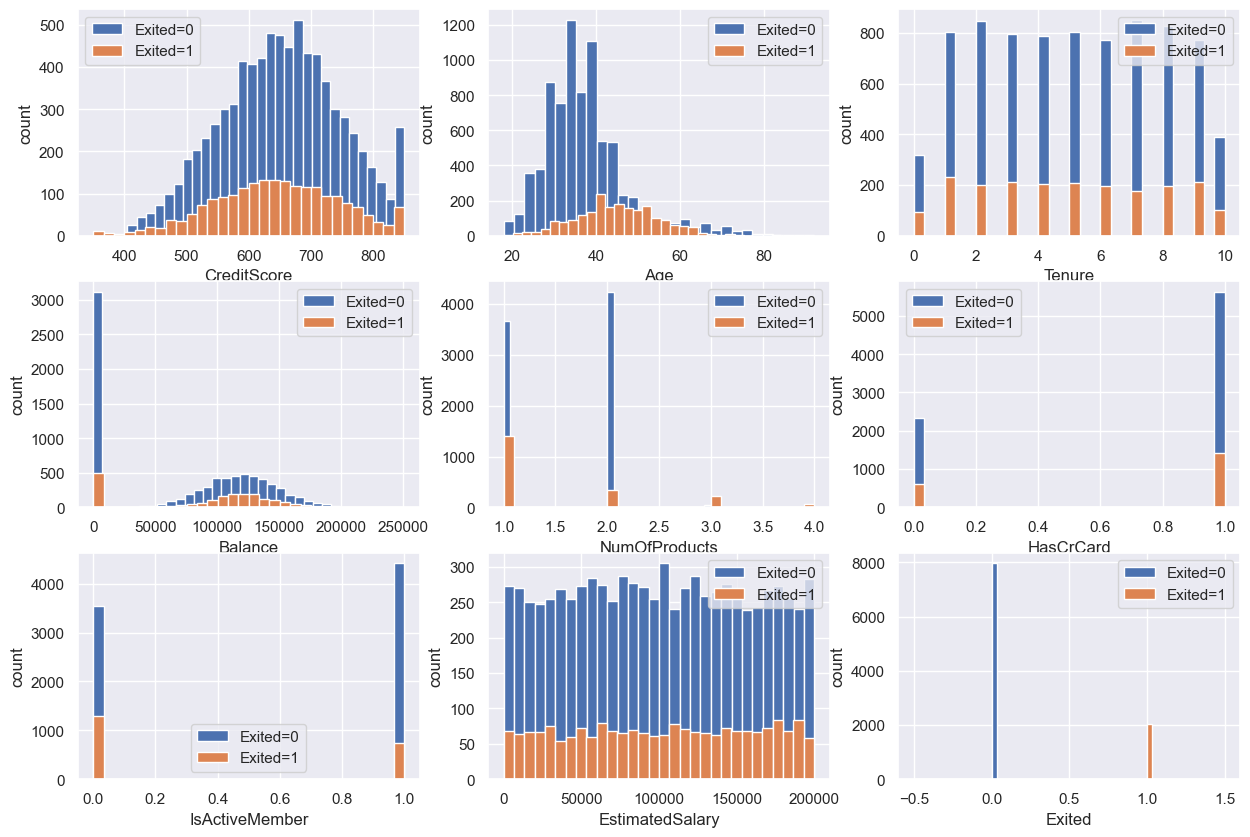

In [13]:
cvars = [i for i in df.columns if df[i].dtypes != 'object']
fig, ax = plt.subplots(3, 3, figsize=(15, 10))

for i, x in enumerate(cvars):
    ax[i // 3, i % 3].hist(df[x][df.Exited == 0], label='Exited=0', bins=30)
    ax[i // 3, i % 3].hist(df[x][df.Exited == 1], label='Exited=1', bins=30)
    ax[i // 3, i % 3].set(xlabel=x, ylabel='count')
    ax[i // 3, i % 3].legend()

plt.savefig('05 3x3 Subplot.jpg', dpi=300)
plt.show()

### 04 PREPARING DATA for building Machine Learning Models

Change value in 'Country'

In [14]:
df['Geography'] = df['Geography'].replace(['Germany'],'0')
df['Geography'] = df['Geography'].replace(['France'],'1')
df['Geography'] = df['Geography'].replace(['Spain'],'2')

Change value in 'Gender'

In [15]:
#Change value in gender column
df['Gender'] = df['Gender'].replace(['Female'],'0')
df['Gender'] = df['Gender'].replace(['Male'],'1')

In [16]:
df.head(10)

CreditScore Geography Gender  Age  Tenure    Balance  NumOfProducts  \
0          619         1      0   42       2       0.00              1   
1          608         2      0   41       1   83807.86              1   
2          502         1      0   42       8  159660.80              3   
3          699         1      0   39       1       0.00              2   
4          850         2      0   43       2  125510.82              1   
5          645         2      1   44       8  113755.78              2   
6          822         1      1   50       7       0.00              2   
7          376         0      0   29       4  115046.74              4   
8          501         1      1   44       4  142051.07              2   
9          684         1      1   27       2  134603.88              1   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0          1               1        101348.88       1  
1          0               1        112542.58       0  
2          1               0        113931.57       1  
3          0               0         93826.63       0  
4          1               1         79084.10       0  
5          1               0        149756.71       1  
6          1               1         10062.80       0  
7          1               0        119346.88       1  
8          0               1         74940.50       0  
9          1               1         71725.73       0

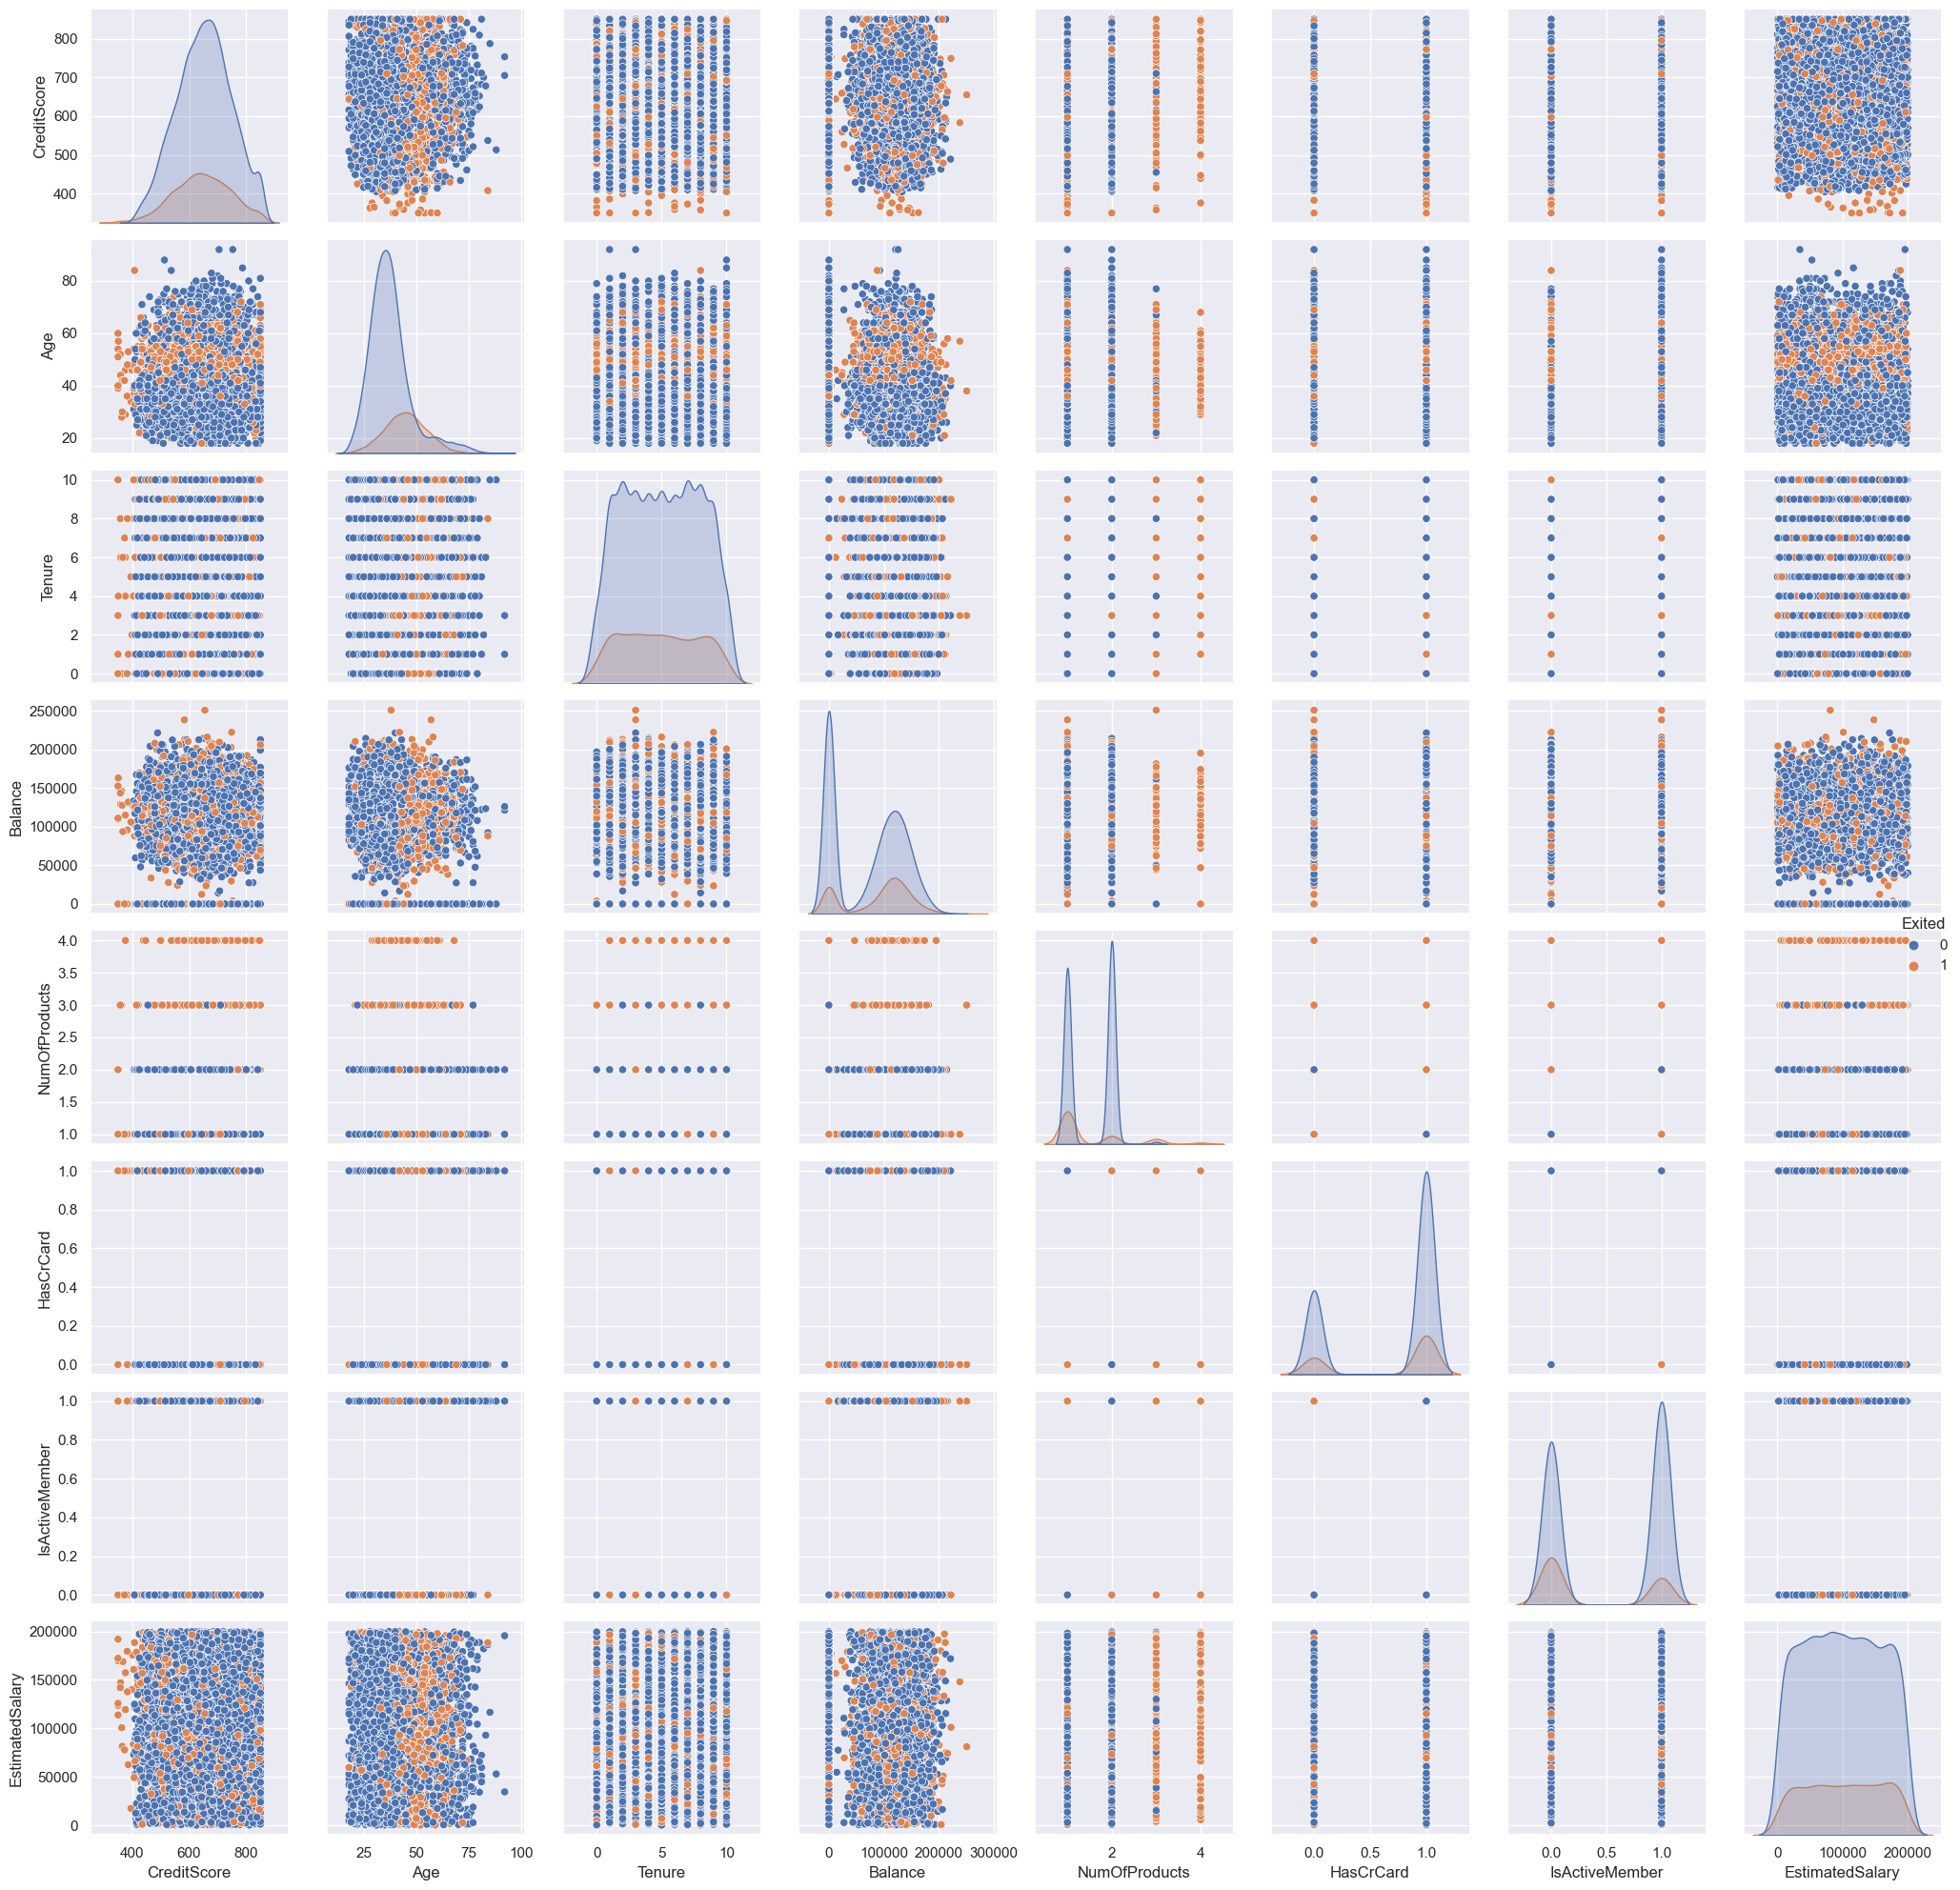

In [17]:
sns.set_style('darkgrid')
sns.pairplot(df, hue='Exited')
plt.tight_layout()

plt.savefig('06 Scatter Matrix.jpg', dpi=300)
plt.show()

### 05 Build Machine Learning Model

#### Split the Data and Train the Model

In [18]:
from sklearn.model_selection import train_test_split

X=df.drop('Exited',axis=1)
y=df['Exited']

# Split the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

### Random Forest

In [19]:
# Import Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import accuracy_score


#### Evaluating Random Forest

In [20]:
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)

RandomForestClassifier()

In [21]:
y_pred = rf_classifier.predict(X_test)

In [22]:
# Classification Report & Accuracy Score
print(classification_report(y_test,y_pred))
print("Random Forest Accuracy Score is",accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.96      0.92      1991
           1       0.76      0.53      0.63       509

    accuracy                           0.87      2500
   macro avg       0.82      0.75      0.77      2500
weighted avg       0.86      0.87      0.86      2500

Random Forest Accuracy Score is 0.87


<Axes: >

Text(0.5, 22.249999999999993, 'Actuals')

Text(54.75, 0.5, 'Predicted')

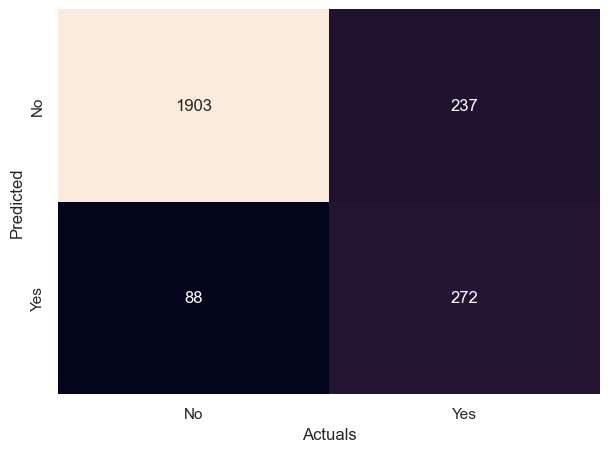

In [23]:
# Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat.T, annot=True, fmt='d', cbar=False,
          xticklabels=['No','Yes'],
          yticklabels=['No','Yes'] )
plt.xlabel('Actuals')
plt.ylabel('Predicted')

plt.savefig('07 CM Random Forest.jpg', dpi=300)
plt.show()

In [24]:
# Creating the feature importances dataframe
feature_importance = np.array(rf_classifier.feature_importances_)
feature_names = np.array(X.columns)

feat_imp = pd.DataFrame({'feature_names':feature_names,'feature_importance':feature_importance})

<Figure size 1000x800 with 0 Axes>

<Axes: xlabel='feature_importance', ylabel='feature_names'>

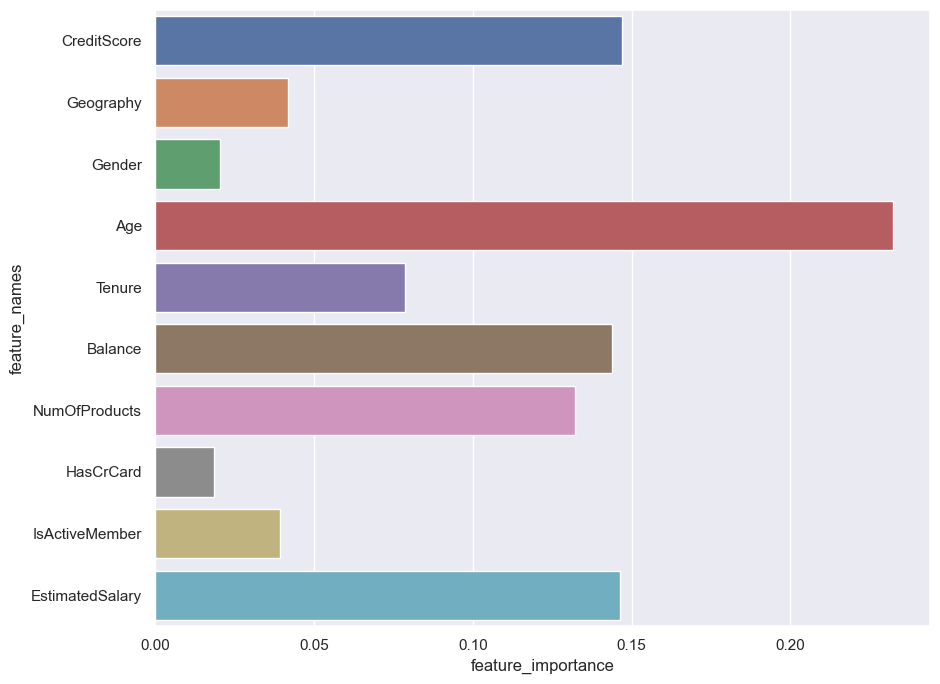

In [25]:
plt.figure(figsize=(10,8))
sns.barplot(x=feat_imp['feature_importance'], y=feat_imp['feature_names'])
plt.savefig('08 Feature Importance.jpg', dpi=300)
plt.show()

In [41]:

# Visualizing a Random Forest

from sklearn import tree

fn = df.columns
cn = ["Yes","No"]

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (40,15))

tree.plot_tree(rf_classifier.estimators_[0],
               feature_names = fn, 
               class_names=cn,
               filled = True);

plt.savefig('09 Random Forest Tree.jpg', dpi=300)

In [28]:
print("Max Tree Depth is:", rf_classifier.estimators_[0].tree_.max_depth)

Max Tree Depth is: 20


### 06 Decision Tree

In [39]:
from sklearn.tree import DecisionTreeClassifier

In [40]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [31]:
y_pred = dtree.predict(X_test)

In [32]:
# Classification Report & Accuracy Score
print(classification_report(y_test,y_pred))
print("Decision Tree Accuracy Score is",accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.85      0.87      1991
           1       0.49      0.56      0.52       509

    accuracy                           0.79      2500
   macro avg       0.69      0.70      0.69      2500
weighted avg       0.80      0.79      0.80      2500

Decision Tree Accuracy Score is 0.792


<Axes: >

Text(0.5, 22.249999999999993, 'Actuals')

Text(54.75, 0.5, 'Predicted')

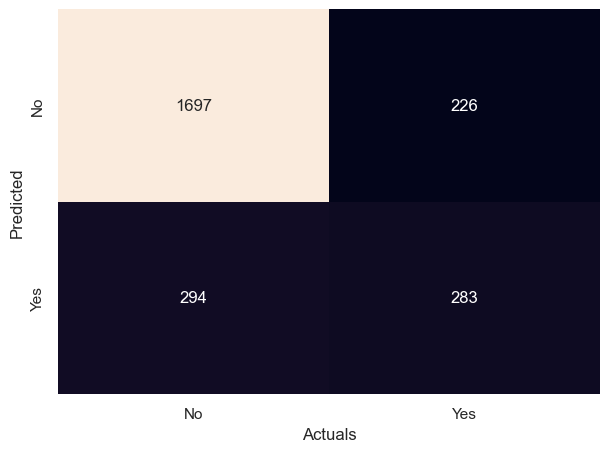

In [33]:
## Confusion Matrix

conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat.T, annot=True, fmt='d', cbar=False,
          xticklabels=['No','Yes'],
          yticklabels=['No','Yes'] )
plt.xlabel('Actuals')
plt.ylabel('Predicted')

plt.savefig('10 CM Decision Tree.jpg', dpi=300)
plt.show()

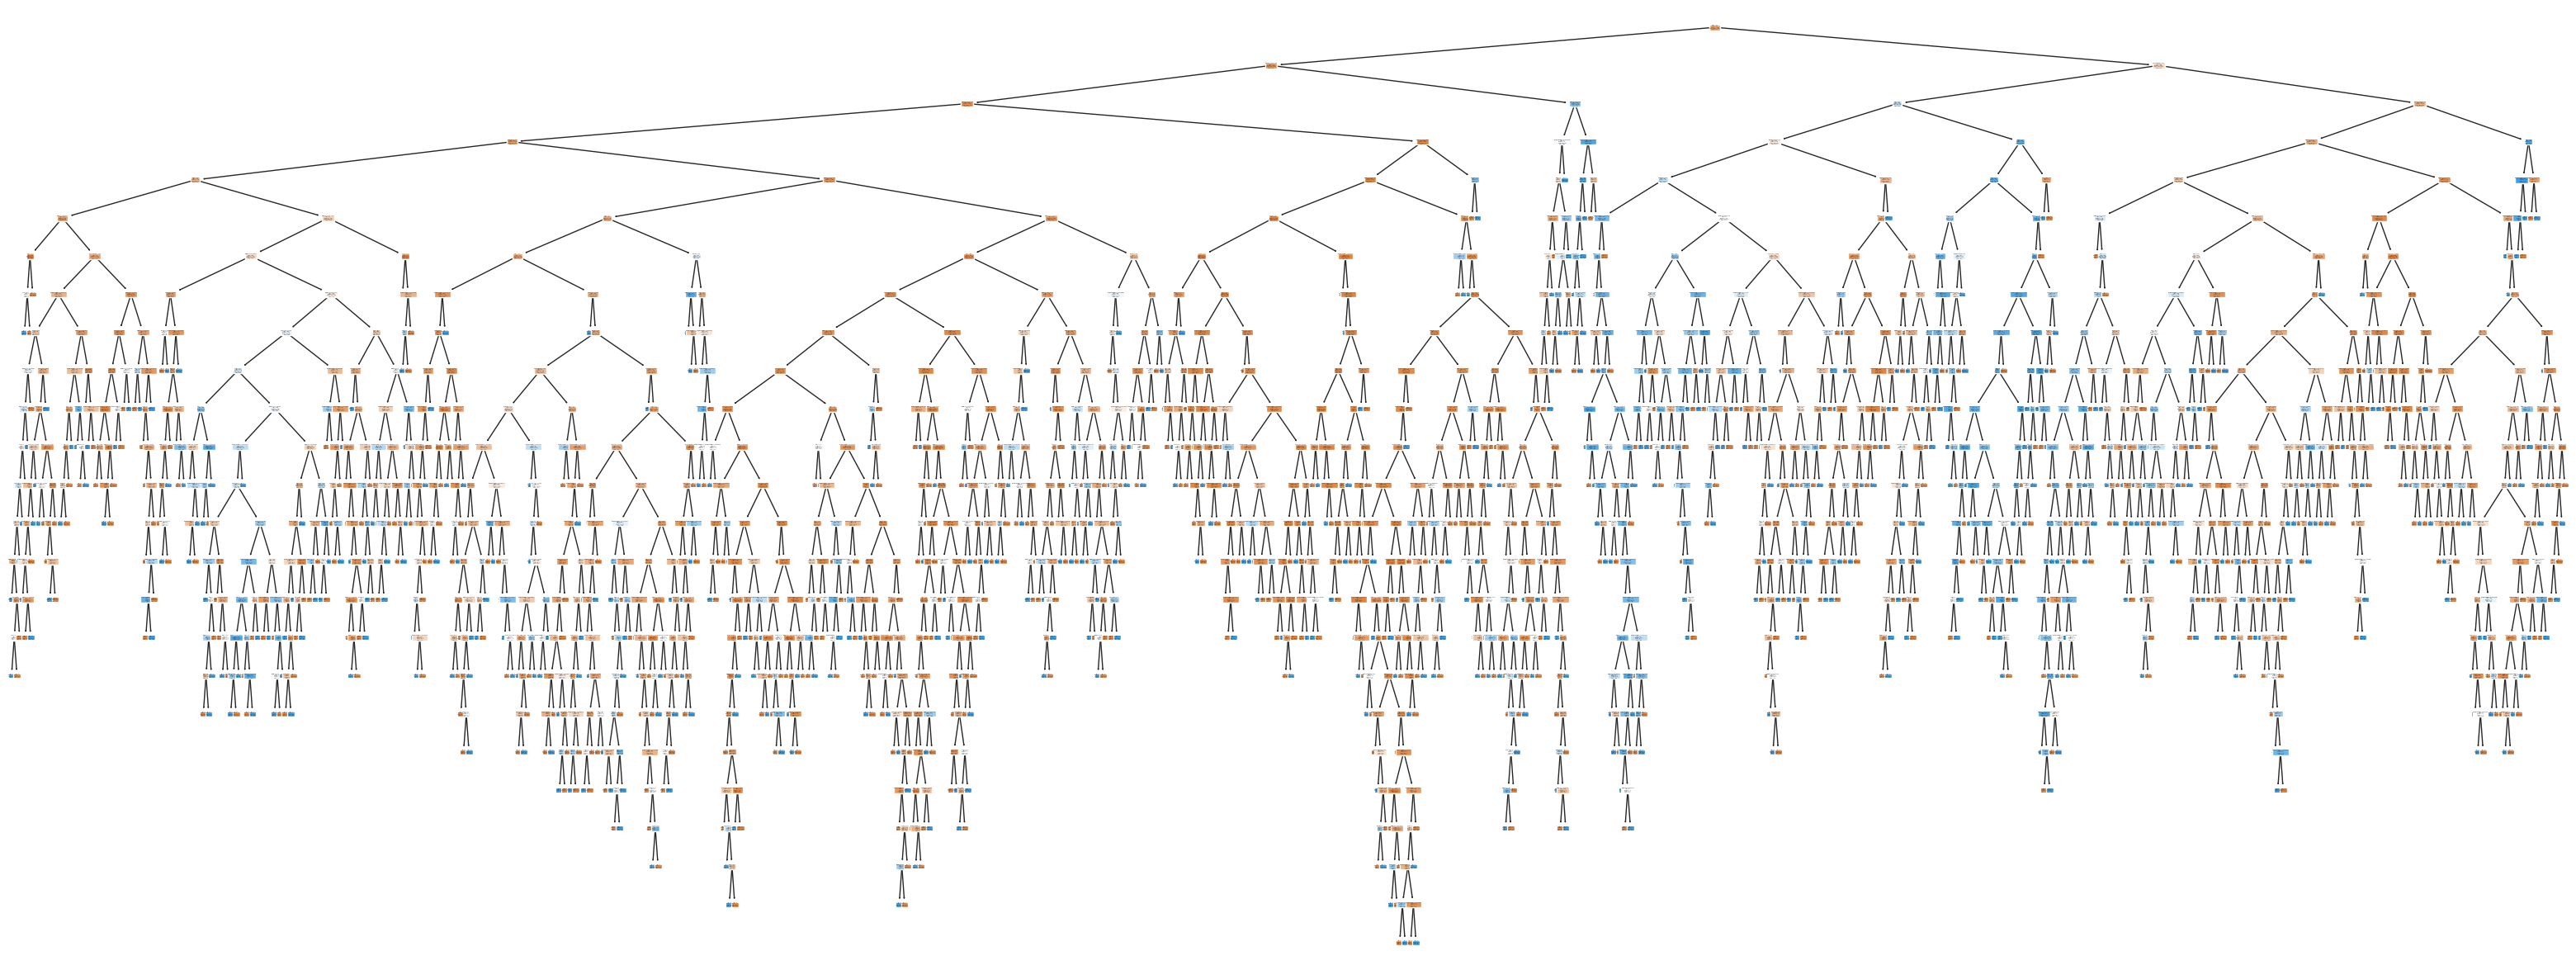

In [34]:
from sklearn import tree
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(40,15))
_ = tree.plot_tree(dtree, 
                   feature_names=fn,  
                   class_names=cn,
                   filled=True)

plt.savefig('11 Decision Tree.jpg', dpi=300)
plt.show()

In [35]:
print("Max Depth of Decision Tree is", dtree.tree_.max_depth)

Max Depth of Decision Tree is 24


### 07 Receiver Operator Characteristic (ROC) Curve and Area under the Curve (AuC)

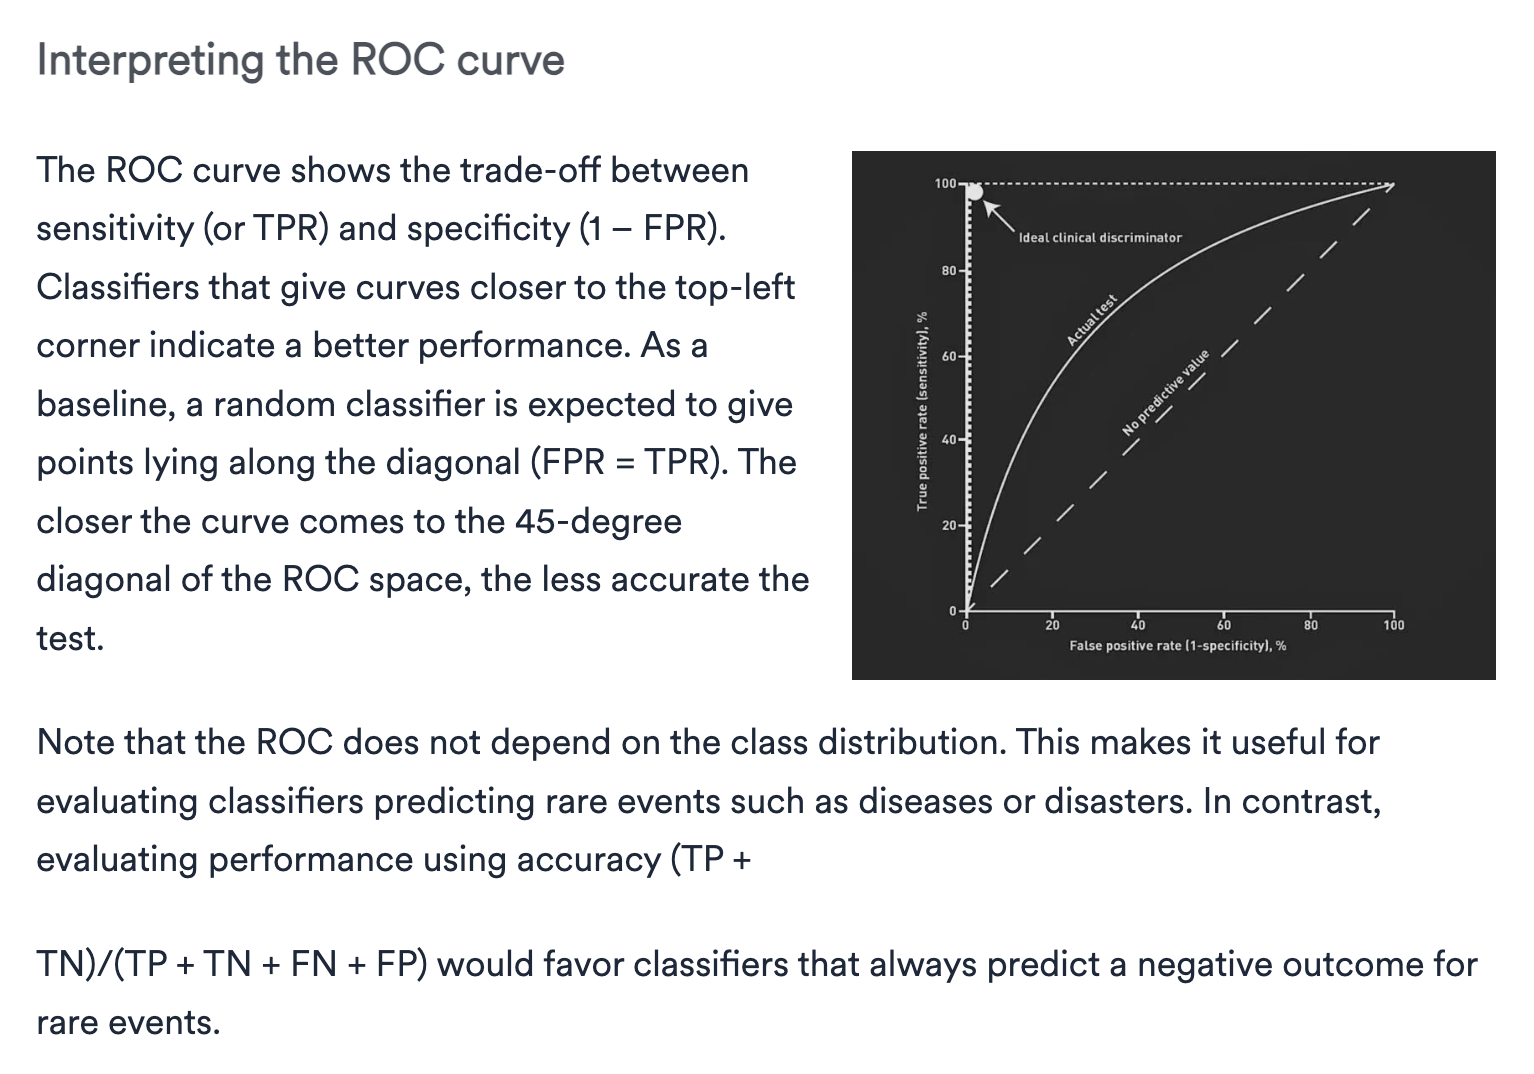

In [36]:
from sklearn.metrics import roc_curve, roc_auc_score

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'ROC Curve (Decision Tree)')

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'ROC Curve (Random Forest)')

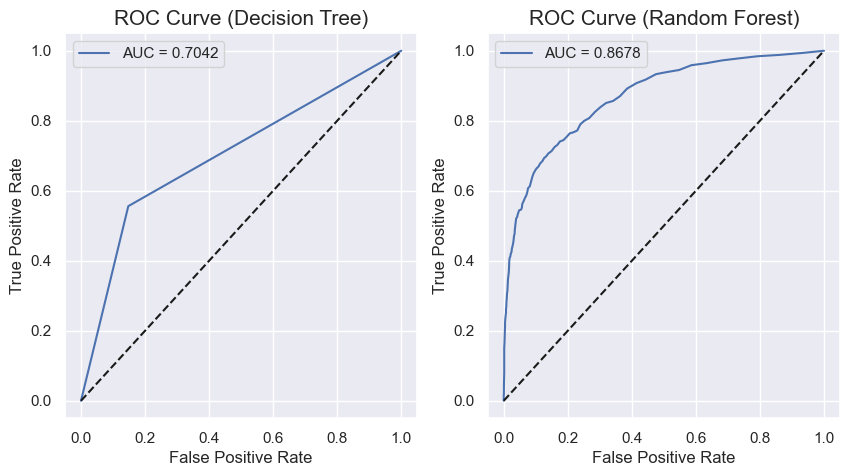

In [37]:
# DECISION TREE ROC
# Get the ground truth and predicted probabilities for the decision tree
y_true = np.array(y_test)
y_pred_proba_dt = dtree.predict_proba(X_test)[:][:, 1]

# Create a DataFrame with the ground truth and predicted probabilities for the decision tree
df_actual_predicted_dt = pd.concat([pd.DataFrame(y_true, columns=['y_true']), pd.DataFrame(y_pred_proba_dt, columns=['y_pred_proba_dt'])], axis=1)

# Calculate the ROC curve and AUC score for the decision tree
fpr_dt, tpr_dt, _ = roc_curve(df_actual_predicted_dt['y_true'], df_actual_predicted_dt['y_pred_proba_dt'])
auc_dt = roc_auc_score(df_actual_predicted_dt['y_true'], df_actual_predicted_dt['y_pred_proba_dt'])

# RANDOM FOREST ROC
# Get the ground truth and predicted probabilities for the random forest classifier
y_true = np.array(y_test)
y_pred_proba_rf = rf_classifier.predict_proba(X_test)[:][:, 1]

# Create a DataFrame with the ground truth and predicted probabilities for the random forest classifier
df_actual_predicted_rf = pd.concat([pd.DataFrame(y_true, columns=['y_true']), pd.DataFrame(y_pred_proba_rf, columns=['y_pred_proba_rf'])], axis=1)

# Calculate the ROC curve and AUC score for the random forest classifier
fpr_rf, tpr_rf, _ = roc_curve(df_actual_predicted_rf['y_true'], df_actual_predicted_rf['y_pred_proba_rf'])
auc_rf = roc_auc_score(df_actual_predicted_rf['y_true'], df_actual_predicted_rf['y_pred_proba_rf'])

# PLOT the ROC curves
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].plot(fpr_dt, tpr_dt, label='AUC = %0.4f' % auc_dt)
ax[0].plot(fpr_dt, fpr_dt, linestyle='--', color='k')
ax[0].set_xlabel('False Positive Rate')
ax[0].set_ylabel('True Positive Rate')
ax[0].set_title('ROC Curve (Decision Tree)', size=15)
ax[0].legend()

ax[1].plot(fpr_rf, tpr_rf, label='AUC = %0.4f' % auc_rf)
ax[1].plot(fpr_rf, fpr_rf, linestyle='--', color='k')
ax[1].set_xlabel('False Positive Rate')
ax[1].set_ylabel('True Positive Rate')
ax[1].set_title('ROC Curve (Random Forest)', size=15)
ax[1].legend()

plt.savefig('12 ROC Curve.jpg', dpi=300)
plt.show()

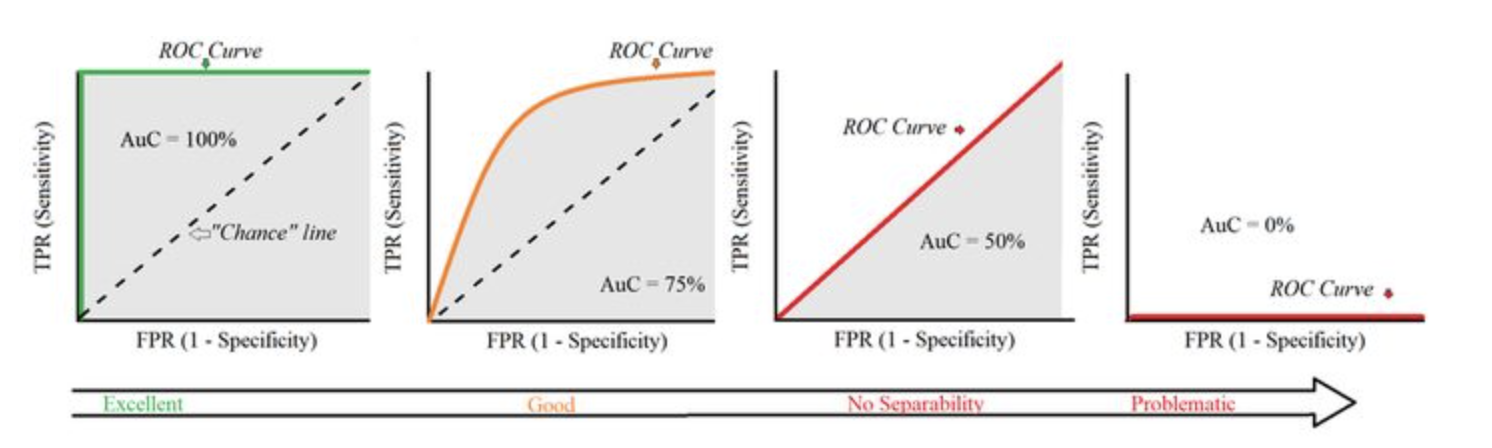

What counts here is how much area is under the curve **(Area under the Curve = AuC)**. The ideal curve in the left image fills in 100%, which means that you’re going to be able to distinguish between negative results and positive results 100% of the time (which is almost impossible in real life). The further you go to the right, the worse the detection. The ROC curve to the far right does a worse job than chance, mixing up the negatives and positives (which means you likely have an error in your setup). 

### 08 CHOOSING between Decision Tree and Random Forest:

**Which ML model has better accuracy score to predict churn.** <br>
The ROC curve and the AuC score shows that Random Forest is more robust in making complex predictions and it has better accuracy.
<br>

**Are there similarities and differences between them.**<br>
**DECISION MAKING** <br> 
**Decision tree** combines some decisions.  
**Random forest** combines several **decision trees**. 

**PROCESSING** <br> 
**Decision tree** is fast and operates easily on large data sets, especially the linear one.<br>
**Random forest** is a long process, yet slow. Its model needs rigorous training.

**ACCURACY** <br> 
**Decision tree** accuracy can vary.<br>
**Random forest** is highly accurate.